In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, MinMaxScaler,OrdinalEncoder

In [2]:
data=pd.read_csv('/content/train_loan_preprocess.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
data['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

Filling null values


In [9]:
data["Gender"].fillna(data["Gender"].mode()[0],inplace=True)

In [10]:
data["Married"].fillna(data["Married"].mode()[0],inplace=True)

In [11]:
data['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [12]:
data["Dependents"].fillna(data["Dependents"].mode()[0],inplace=True)

In [13]:
data['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [14]:
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)

In [15]:
data['LoanAmount'].value_counts()

LoanAmount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 203, dtype: int64

<Axes: xlabel='LoanAmount', ylabel='Count'>

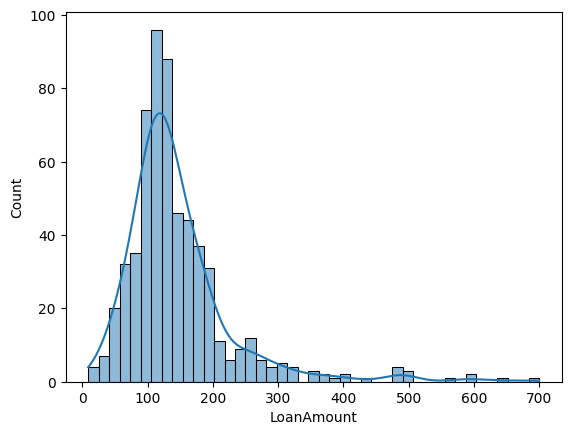

In [16]:
sns.histplot(data['LoanAmount'],kde=True)

In [17]:
data['LoanAmount'].fillna(data['LoanAmount'].mean(),inplace=True) #mean can be used for null replacement

In [18]:
data['Loan_Amount_Term'].value_counts()


Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [19]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)

In [20]:
data['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [21]:
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)

In [22]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [23]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


### outlier handling

<Axes: ylabel='ApplicantIncome'>

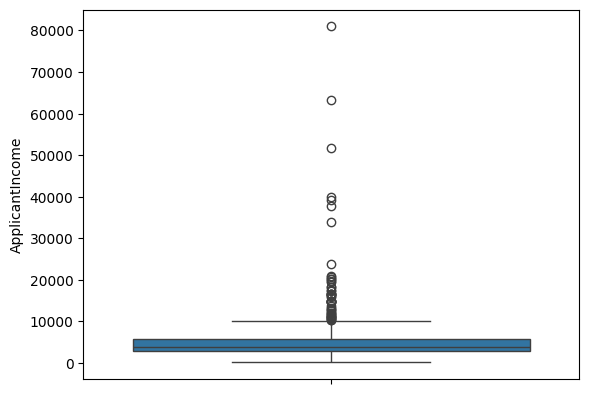

In [24]:
sns.boxplot(data['ApplicantIncome'])

<Axes: ylabel='CoapplicantIncome'>

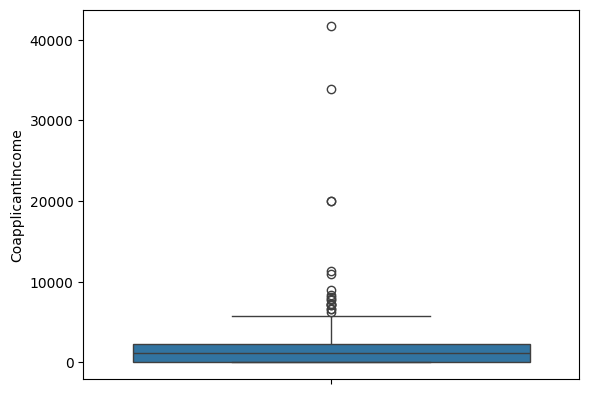

In [25]:
sns.boxplot(data['CoapplicantIncome'])

<Axes: ylabel='LoanAmount'>

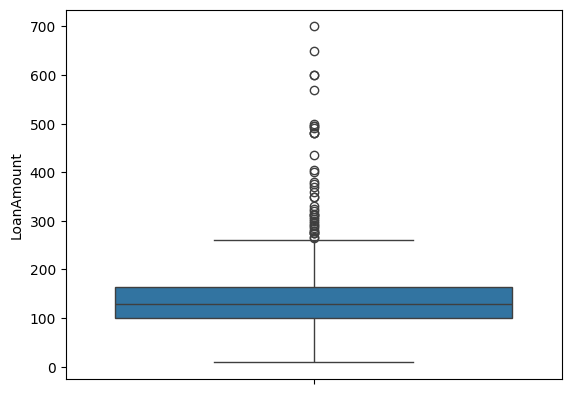

In [26]:
sns.boxplot(data['LoanAmount'])

In [27]:
ai1=np.percentile(data['ApplicantIncome'],25,interpolation='midpoint')
ai3=np.percentile(data['ApplicantIncome'],75,interpolation='midpoint')
ai2=np.percentile(data['ApplicantIncome'],50,interpolation='midpoint')

In [28]:
print(ai1,ai2,ai3)

2879.0 3812.5 5790.0


In [29]:
IQR=ai3-ai1
IQR

2911.0

In [30]:
min_val=ai1-(1.5*IQR)
min_val

-1487.5

In [31]:
max_val=ai3+(1.5*IQR)
max_val

10156.5

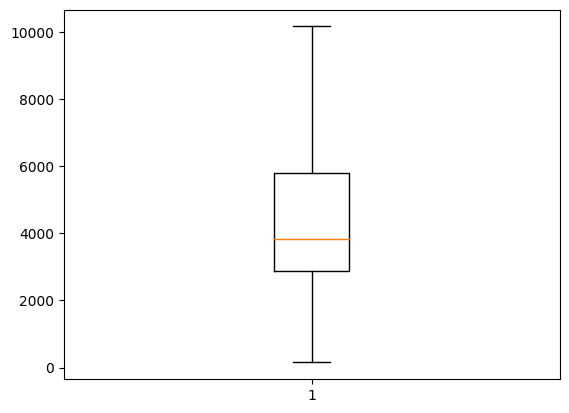

In [32]:
data['ApplicantIncome'] = data['ApplicantIncome'].clip(min_val,max_val)
plt.boxplot(data['ApplicantIncome'])
plt.show()

### encoding and scaling


In [33]:
data1=data.copy()

In [35]:
label_enc=LabelEncoder()
data1['LoanID_enc'] =label_enc.fit_transform(data1['Loan_ID'])
data1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanID_enc
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y,0
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N,1
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y,2
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y,3
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.000000,360.0,1.0,Rural,Y,609
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.000000,180.0,1.0,Rural,Y,610
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.000000,360.0,1.0,Urban,Y,611
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.000000,360.0,1.0,Urban,Y,612


In [36]:
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoded = one_hot_encoder.fit_transform(data1[['Property_Area']])
one_hot_encoded

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [37]:
one_hot_data = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(['Property_Area']))
data1 = pd.concat([data1, one_hot_data], axis=1)
data1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanID_enc,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y,0,0.0,0.0,1.0
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N,1,1.0,0.0,0.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y,2,0.0,0.0,1.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y,3,0.0,0.0,1.0
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y,4,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.000000,360.0,1.0,Rural,Y,609,1.0,0.0,0.0
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.000000,180.0,1.0,Rural,Y,610,1.0,0.0,0.0
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.000000,360.0,1.0,Urban,Y,611,0.0,0.0,1.0
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.000000,360.0,1.0,Urban,Y,612,0.0,0.0,1.0


In [38]:
ord_encoder = OrdinalEncoder()
data1['Property_Area_enc'] = ord_encoder.fit_transform(data1[['Property_Area']])
data1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanID_enc,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Property_Area_enc
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y,0,0.0,0.0,1.0,2.0
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N,1,1.0,0.0,0.0,0.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y,2,0.0,0.0,1.0,2.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y,3,0.0,0.0,1.0,2.0
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y,4,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.000000,360.0,1.0,Rural,Y,609,1.0,0.0,0.0,0.0
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.000000,180.0,1.0,Rural,Y,610,1.0,0.0,0.0,0.0
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.000000,360.0,1.0,Urban,Y,611,0.0,0.0,1.0,2.0
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.000000,360.0,1.0,Urban,Y,612,0.0,0.0,1.0,2.0


In [39]:
std_scaler = StandardScaler()
data1['LoanAmount_scaled'] = std_scaler.fit_transform(data1[['LoanAmount']])
data1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanID_enc,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Property_Area_enc,LoanAmount_scaled
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y,0,0.0,0.0,1.0,2.0,0.000000
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N,1,1.0,0.0,0.0,0.0,-0.219273
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y,2,0.0,0.0,1.0,2.0,-0.957641
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y,3,0.0,0.0,1.0,2.0,-0.314547
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y,4,0.0,0.0,1.0,2.0,-0.064454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.000000,360.0,1.0,Rural,Y,609,1.0,0.0,0.0,0.0,-0.898095
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.000000,180.0,1.0,Rural,Y,610,1.0,0.0,0.0,0.0,-1.267279
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.000000,360.0,1.0,Urban,Y,611,0.0,0.0,1.0,2.0,1.269371
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.000000,360.0,1.0,Urban,Y,612,0.0,0.0,1.0,2.0,0.483367


In [41]:
minmax_scaler = MinMaxScaler()
data1['LoanAmount_min'] = minmax_scaler.fit_transform(data1[['LoanAmount']])
data1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Property_Area,Loan_Status,LoanID_enc,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Property_Area_enc,LoanAmount_scaled,LoanAmount_minscaled,LoanAmount_min
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,...,Urban,Y,0,0.0,0.0,1.0,2.0,0.000000,0.198860,0.198860
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,...,Rural,N,1,1.0,0.0,0.0,0.0,-0.219273,0.172214,0.172214
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,...,Urban,Y,2,0.0,0.0,1.0,2.0,-0.957641,0.082489,0.082489
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,...,Urban,Y,3,0.0,0.0,1.0,2.0,-0.314547,0.160637,0.160637
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,...,Urban,Y,4,0.0,0.0,1.0,2.0,-0.064454,0.191027,0.191027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.000000,360.0,...,Rural,Y,609,1.0,0.0,0.0,0.0,-0.898095,0.089725,0.089725
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.000000,180.0,...,Rural,Y,610,1.0,0.0,0.0,0.0,-1.267279,0.044863,0.044863
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.000000,360.0,...,Urban,Y,611,0.0,0.0,1.0,2.0,1.269371,0.353111,0.353111
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.000000,360.0,...,Urban,Y,612,0.0,0.0,1.0,2.0,0.483367,0.257598,0.257598


In [43]:
scale_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
data2 = data1.copy()
data2 = data2.drop(columns=['Loan_ID', 'Gender', 'Married', 'Dependents',  'Education',   'Self_Employed', 'Loan_Amount_Term',	'Credit_History', 'Property_Area', 'Loan_Status', 'Property_Area_enc', 'LoanAmount_scaled', 'LoanAmount_minscaled'])
for col in scale_columns:
    data2[col] = minmax_scaler.fit_transform(data2[[col]])
data2.head()


,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanID_enc,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,LoanAmount_min
0,0.569530,0.000000,0.198860,0,0.0,0.0,1.0,0.198860
1,0.443012,0.036192,0.172214,1,1.0,0.0,0.0,0.172214
2,0.284815,0.000000,0.082489,2,0.0,0.0,1.0,0.082489
3,0.243142,0.056592,0.160637,3,0.0,0.0,1.0,0.160637
4,0.584620,0.000000,0.191027,4,0.0,0.0,1.0,0.191027


In [45]:
corr_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','LoanAmount_min']
corr_matrix = data2[corr_columns].corr()
corr_matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmount_min
ApplicantIncome,1.000000,-0.185216,0.560469,0.560469
CoapplicantIncome,-0.185216,1.000000,0.187828,0.187828
LoanAmount,0.560469,0.187828,1.000000,1.000000
LoanAmount_min,0.560469,0.187828,1.000000,1.000000


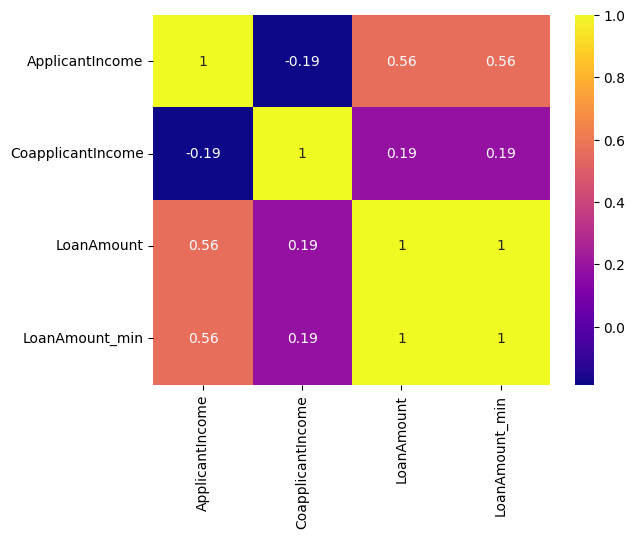

In [46]:
sns.heatmap(corr_matrix, annot=True, cmap='plasma')
plt.show()